# Social Media Group Assignment Citation Network

# Import Libraries

In [20]:
import numpy as np 
import pandas as pd 
import ijson
import time
import csv
import numpy as np
from decimal import Decimal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data

In [3]:
#read csv data
df = pd.read_csv("E:\MASTERS\Term 4- Winter 2\Social Media\Group Project\DBLP_citation.csv")

In [4]:
df.head()

,title,authors,year,venue,id,references,abstract,citation_count
0,OQL[C++]: Extending C++ with an Object Query C...,['José A. Blakeley'],1995,Modern Database Systems,0,[],NaN,5
1,Transaction Management in Multidatabase Systems.,"['Yuri Breitbart', 'Hector Garcia-Molina', 'Ab...",1995,Modern Database Systems,1,[],NaN,0
2,Overview of the ADDS System.,"['Yuri Breitbart', 'Tom C. Reyes']",1995,Modern Database Systems,2,[],NaN,0
3,Multimedia Information Systems: Issues and App...,"['Stavros Christodoulakis', 'Leonidas Koveos']",1995,Modern Database Systems,3,[],NaN,2
4,Active Database Systems.,"['Umeshwar Dayal', 'Eric N. Hanson', 'Jennifer...",1995,Modern Database Systems,4,['995520'],NaN,16


In [5]:
df.columns

Index(['title', 'authors', 'year', 'venue', 'id', 'references', 'abstract',
       'citation_count'],
      dtype='object')

In [6]:
df.shape

(1632442, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632442 entries, 0 to 1632441
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   title           1632442 non-null  object
 1   authors         1632442 non-null  object
 2   year            1632442 non-null  int64 
 3   venue           1630753 non-null  object
 4   id              1632442 non-null  int64 
 5   references      1632442 non-null  object
 6   abstract        653506 non-null   object
 7   citation_count  1632442 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 99.6+ MB


# EDA

In [8]:
df.isnull().sum()

title                  0
authors                0
year                   0
venue               1689
id                     0
references             0
abstract          978936
citation_count         0
dtype: int64

Summary Statistics for 'year':
count    1.455500e+06
mean     2.001913e+03
std      7.600838e+00
min      1.936000e+03
25%      1.999000e+03
50%      2.004000e+03
75%      2.007000e+03
max      2.011000e+03
Name: year, dtype: float64

Summary Statistics for 'citation_count':
count    1.455500e+06
mean     1.594999e+00
std      1.108236e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.474000e+03
Name: citation_count, dtype: float64


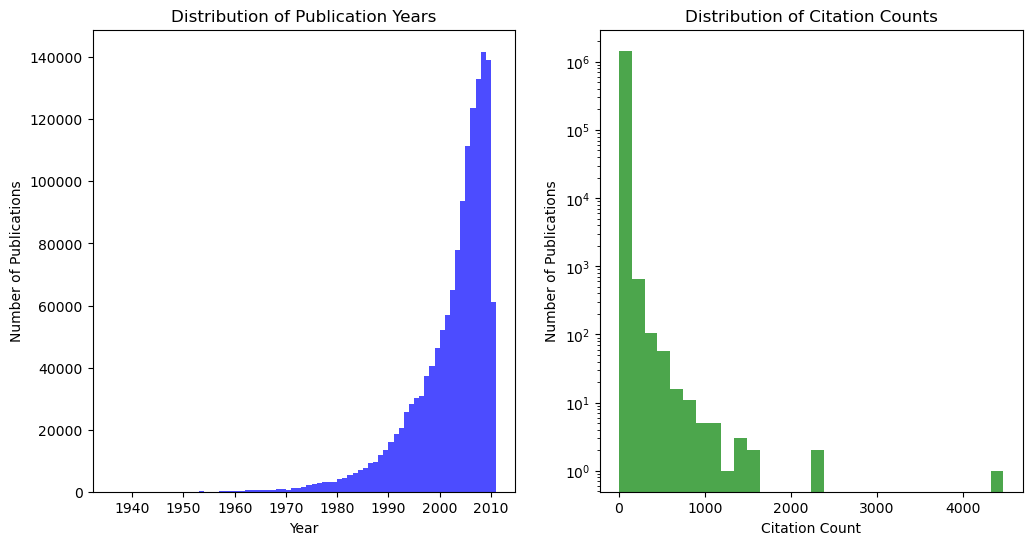

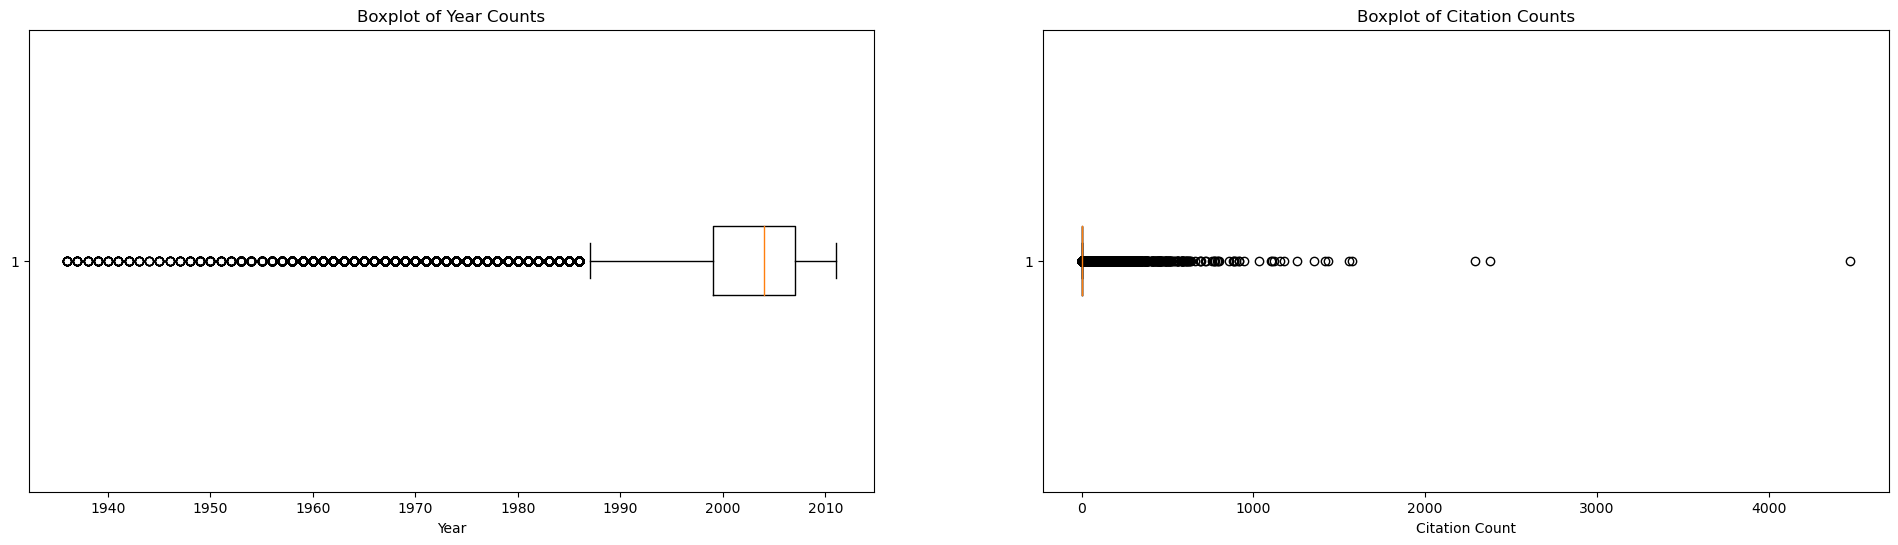

In [48]:
# Summary statistics for numerical data
print("Summary Statistics for 'year':")
print(df['year'].describe())

print("\nSummary Statistics for 'citation_count':")
print(df['citation_count'].describe())

# Histograms for numerical data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['year'], bins=range(min(df['year']), max(df['year']) + 1), color='blue', alpha=0.7)
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Publications')

plt.subplot(1, 2, 2)
plt.hist(df['citation_count'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Citation Counts')
plt.xlabel('Citation Count')
plt.ylabel('Number of Publications')
plt.yscale('log')  # Use logarithmic scale if data is skewed
plt.show()

# Set the size of the overall figure
plt.figure(figsize=(24, 6))

# First subplot for 'year'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.boxplot(df['year'], vert=False)
plt.title('Boxplot of Year Counts')
plt.xlabel('Year')

# Second subplot for 'citation_count'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.boxplot(df['citation_count'], vert=False)
plt.title('Boxplot of Citation Counts')
plt.xlabel('Citation Count')

# Show the figure with both subplots
plt.show()



Insights: 
1. Data is largely constitued by publication around year 2000. The year boxplot indicates a concentration of publication dates between the interquartile range of around 1990 to 2010, with a median publication year close to 2005.
2. Citation distribution is highly skewed. The histogram of citation counts, plotted on a logarithmic scale, reinforces the presence of a power-law (or Pareto) distribution in the citation data. The steep drop-off as citation counts increase confirms that few publications receive a very high number of citations, while the majority of publications are cited less frequently. This pattern is characteristic of scholarly impact, where a minority of works are highly influential.
3. There are a few publications with very high citation counts, as indicated by the bars on the far right of the graph. These could be seminal papers in their fields.





In [32]:
# Check the author counts directly
author_counts = df['authors'].value_counts().head(10)
print(author_counts)


['']                                       18242
['Diane Crawford']                           250
['Irith Pomeranz', 'Sudhakar M. Reddy']      241
['Robert L. Glass']                          228
['Bill Hancock']                             185
['Ronald R. Yager']                          160
['Peter G. Neumann']                         142
['Gilbert Held']                             119
['Greg Goth']                                118
['David B. Lomet']                           115
Name: authors, dtype: int64


Insight : Many authors with " empty fields-Exclude authors with ''

In [37]:
#remove the rows with missing values of authors
df=df[df['authors'] != "['']"]

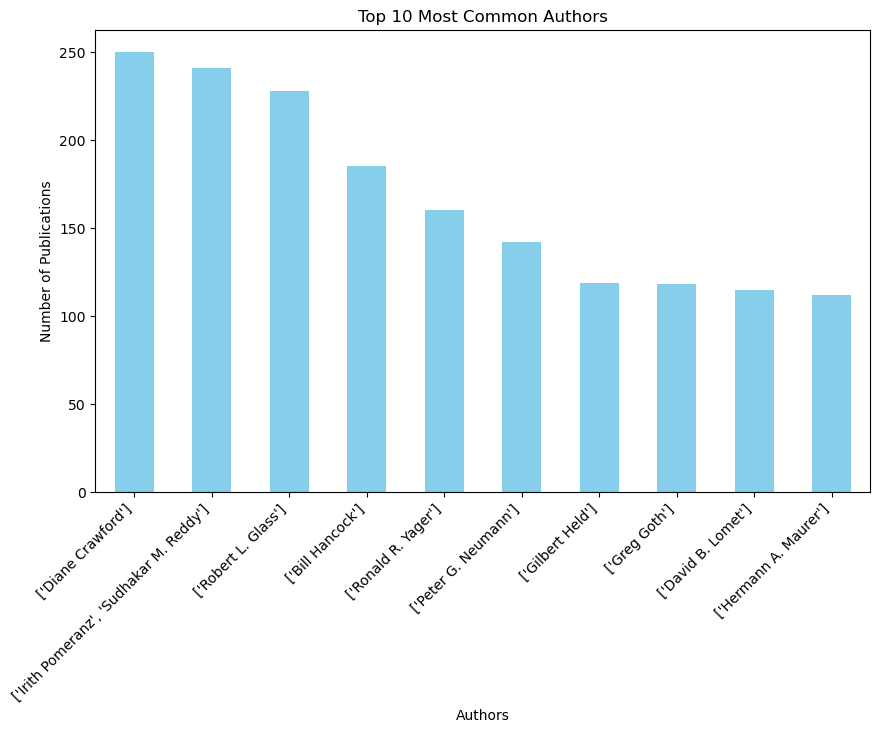

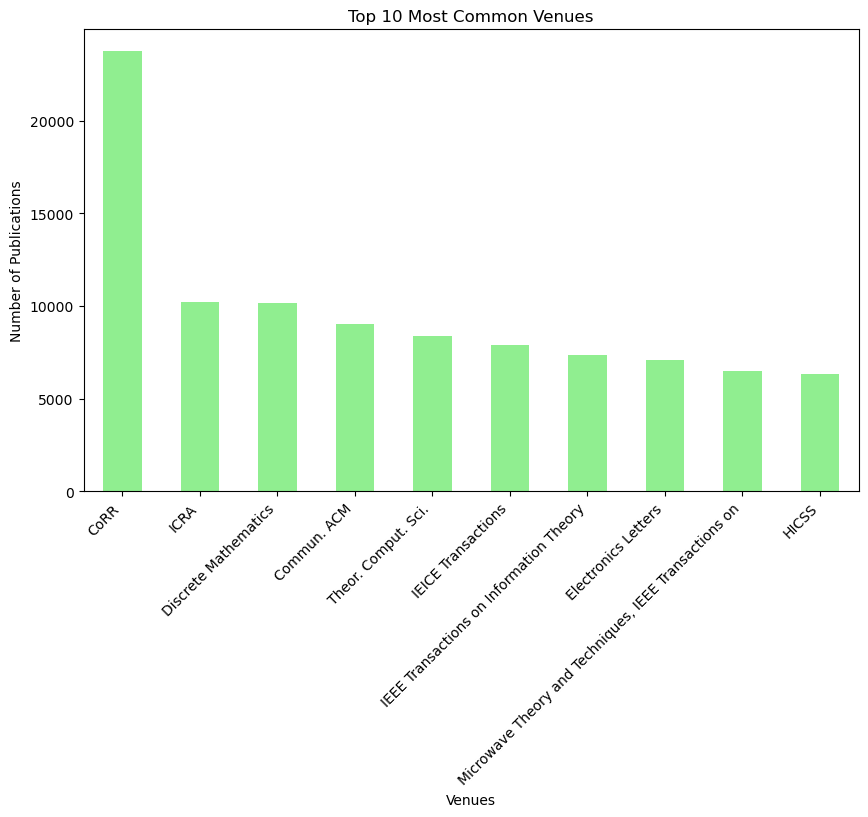

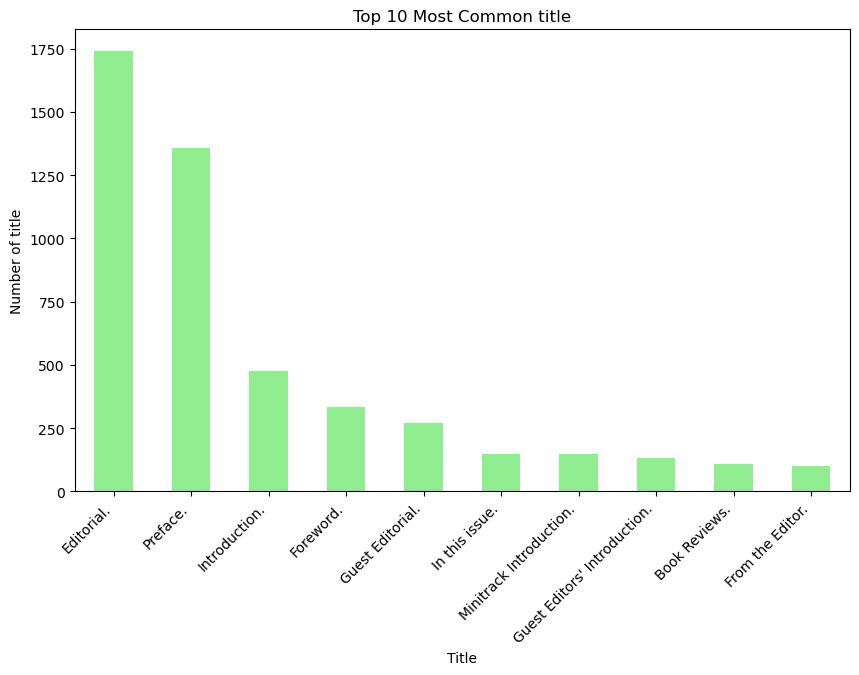

In [34]:

# Plotting the top 10 most common authors
author_counts = df['authors'].value_counts().head(10)
plt.figure(figsize=(10, 6))
author_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Authors')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')  # Rotate labels to improve readability
plt.show()

# Plotting the top 10 most common venues
venue_counts = df['venue'].value_counts().head(10)
plt.figure(figsize=(10, 6))
venue_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Common Venues')
plt.xlabel('Venues')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')  # Rotate labels to improve readability
plt.show()

# Plotting the top 10 most common title
venue_counts = df['title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
venue_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Common title')
plt.xlabel('Title')
plt.ylabel('Number of title')
plt.xticks(rotation=45, ha='right')  # Rotate labels to improve readability
plt.show()

# Citation Insights

In [41]:
# Sort the DataFrame based on 'citation_count' to identify most cited papers
most_cited_papers = df.sort_values(by='citation_count', ascending=False)

# Display the top 5 most cited papers
print("Top 5 most cited papers:")
print(most_cited_papers[['title', 'authors', 'citation_count']].head(5))


Top 5 most cited papers:
                                                  title  \
759   Computers and Intractability: A Guide to the T...   
2358                C4.5: Programs for Machine Learning   
2020                         Introduction to Algorithms   
2595                 Communicating Sequential Processes   
77         Compilers: Princiles, Techniques, and Tools.   

                                                authors  citation_count  
759                 ['M. R. Garey', 'David S. Johnson']            4474  
2358                                ['J. Ross Quinlan']            2375  
2020  ['Thomas H. Cormen', 'Charles E. Leiserson', '...            2292  
2595                                 ['C. A. R. Hoare']            1573  
77    ['Alfred V. Aho', 'Ravi Sethi', 'Jeffrey D. Ul...            1555  


In [42]:
df['authors_list'] = df['authors'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

# Explode the DataFrame so that each author gets a separate row
exploded_df = df.explode('authors_list')

# Group by authors and sum citation counts
author_citations = exploded_df.groupby('authors_list')['citation_count'].sum().sort_values(ascending=False)

# Display the top 5 most cited authors
print("Top 5 most cited authors:")
print(author_citations.head(5))

Top 5 most cited authors:
authors_list
['Rakesh Agrawal'        6401
 'David S. Johnson']     4737
 'Jeffrey D. Ullman']    4655
['M. R. Garey'           4636
['J. Ross Quinlan']      3714
Name: citation_count, dtype: int64


In [58]:
import pandas as pd

# Assuming your DataFrame is named df and it's already loaded

# Define a function to categorize papers based on specific citation count thresholds
def categorize_citations(citation_count):
    if citation_count == 0:
        return 'Seldom Cited'
    elif 0 < citation_count <= 10:
        return 'Moderately Cited'
    elif 10 < citation_count <= 100:
        return 'Frequently Cited'
    else:
        return 'Highly Cited'

# Apply the function to create a new column 'citation_category'
df['citation_category'] = df['citation_count'].apply(categorize_citations)

# Group by 'citation_category' and calculate mean, median of citation counts
# and count the number of papers in each category
grouped = df.groupby('citation_category')['citation_count'].agg(['mean', 'median', 'count'])

# Print the grouped analysis
print(grouped)


                         mean  median    count
citation_category                             
Frequently Cited    24.678686    18.0    45952
Highly Cited       198.573021   146.0     1794
Moderately Cited     2.867206     2.0   289915
Seldom Cited         0.000000     0.0  1117839


Insights: 
1. Seldom Cited: Most of the papers fall into this category with 1,117,839 papers having zero citations. This highlights a common phenomenon in academic publishing where a significant portion of the output is not cited.
2. Moderately Cited: This category includes papers that have been cited between 1 and 10 times. It contains 289,915 papers with an average of approximately 2.87 citations, and the median being 2. This shows that while these papers have garnered some attention, their impact is relatively limited.
3. Frequently Cited: Papers in this category, cited between 11 and 100 times, total 45,952. They have a mean citation count of about 24.68 and a median of 18. This indicates a higher level of academic influence or utility, with citations spreading more into the middle range.
4. Highly Cited: The smallest group consists of 1,794 papers, but these are the most influential, with a mean citation count of 198.57 and a median of 146. Papers in this category are likely key works in their fields, potentially seminal papers that have significantly influenced other research.

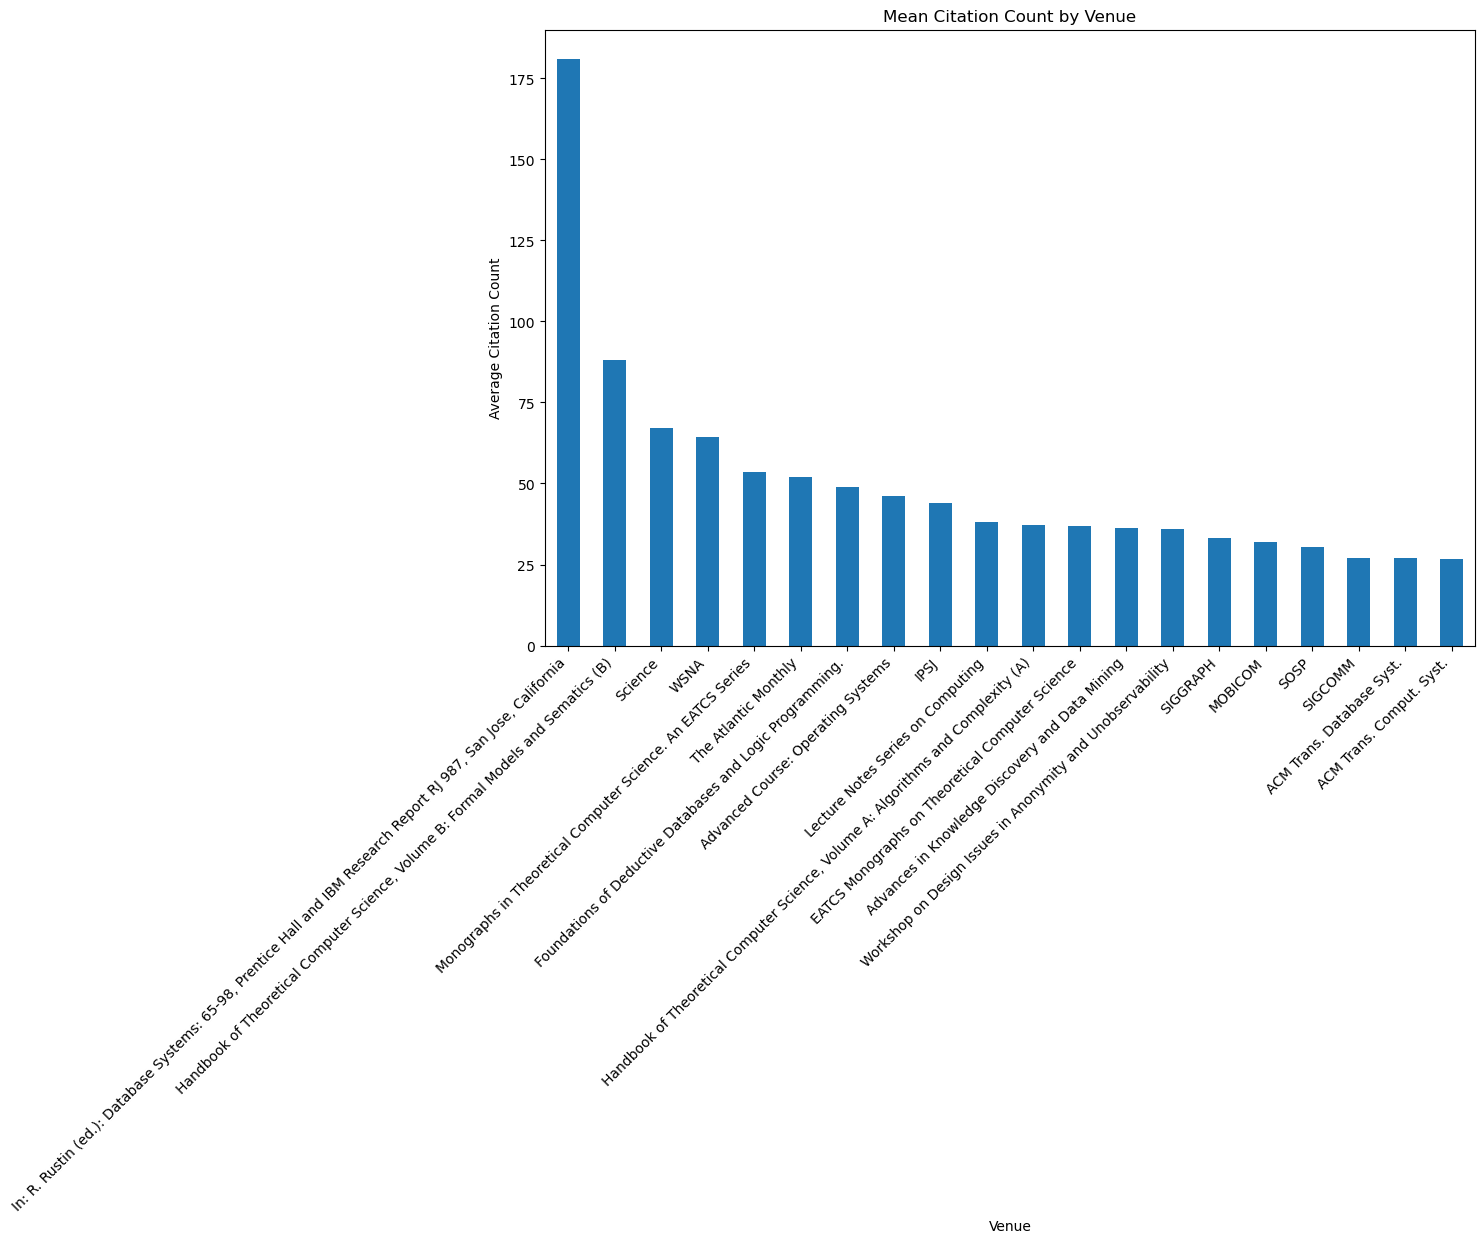

In [60]:

# Group data by 'venue' and calculate summary statistics for 'citation_count'
citation_stats_by_venue = df.groupby('venue')['citation_count'].agg(['mean', 'median', 'std', 'count'])

# Sort the results by the mean citation count to see which venues have the highest impact
sorted_citation_stats_by_venue = citation_stats_by_venue.sort_values(by='mean', ascending=False)

# Plot the mean citation counts for the top 20 venues
top_venues = sorted_citation_stats_by_venue.head(20)
plt.figure(figsize=(12, 8))
top_venues['mean'].plot(kind='bar')
plt.title('Mean Citation Count by Venue')
plt.xlabel('Venue')
plt.ylabel('Average Citation Count')
plt.xticks(rotation=45, ha='right')  # Rotate venue labels for better readability
plt.show()


Insights:
1. There is a clear disparity among venues in terms of their average citation counts. The venue with the highest average citation count significantly outperforms others, suggesting it may be a leading journal or conference in its field or has published particularly influential papers.
2. The average citation count shows a decreasing trend as we move from the highest-ranked venue to others. However, there are still several venues with a substantial average citation count, indicating that there are multiple influential venues within the dataset, albeit with varying degrees of impact.

# Authors Insight

In [61]:

# Determine the number of authors for each paper
# Here, we're assuming authors are separated by commas
df['author_count'] = df['authors'].str.split(',').apply(len)

# Categorize papers as 'Solo' or 'Collaborative' based on the number of authors
df['collaboration_type'] = df['author_count'].apply(lambda x: 'Solo' if x == 1 else 'Collaborative')

# Group by 'collaboration_type' and calculate mean, median, and count of citation counts
collaboration_citation_stats = df.groupby('collaboration_type')['citation_count'].agg(['mean', 'median', 'count'])

# Print the grouped analysis
print(collaboration_citation_stats)


                        mean  median    count
collaboration_type                           
Collaborative       1.617648     0.0  1134059
Solo                1.515093     0.0   321441


Insights:
1. Collaboration vs. Solo Work: Collaboration on papers does not necessarily translate to a higher citation count in this dataset, but there is a small increase in the average citation count for collaborative papers.
2. Median Citation Count: The median citation count being 0 for both collaborative and solo-authored papers highlights the skewed nature of citation distribution, where a large number of papers receive no citations at all.
3. Count of Papers: There are significantly more collaborative papers than solo-authored papers, which may reflect a trend in research towards collaboration.

In [62]:

#  we create a list of authors for each paper
# We then explode this list so that each author gets their own row for each paper they contributed to
df['authors_list'] = df['authors'].str.split(',')
exploded_authors = df.explode('authors_list')

# Now group by individual authors and calculate the number of papers and mean citation counts
author_paper_counts = exploded_authors.groupby('authors_list').agg(
    num_papers=pd.NamedAgg(column='title', aggfunc='count'),  # count the number of papers per author
    mean_citations=pd.NamedAgg(column='citation_count', aggfunc='mean')  # average citation count per author
)

# Sort authors by the number of papers published
sorted_author_paper_counts = author_paper_counts.sort_values(by='num_papers', ascending=False)

# Print the top 10 authors who have published the most papers
print("Top 10 authors by number of papers published:")
print(sorted_author_paper_counts.head(10))

# To compare these top authors' citation counts to the rest of the dataset,
# we can calculate the overall mean citation count
overall_mean_citation = df['citation_count'].mean()

# Then print out the comparison
print("\nOverall mean citation count across all papers:", overall_mean_citation)


Top 10 authors by number of papers published:
                                        num_papers  mean_citations
authors_list                                                      
 'Edwin R. Hancock']                           445        1.071910
 'Thomas S. Huang']                            423        1.742317
 'Hans-Peter Seidel']                          384        3.361979
 'Philip S. Yu']                               375        7.696000
['Noga Alon'                                   361        4.963989
 'Sudhakar M. Reddy']                          354        1.850282
 'Alberto L. Sangiovanni-Vincentelli']         329        5.079027
 'Mario Piattini']                             324        0.259259
 'Kang G. Shin']                               322        4.509317
 'Makoto Takizawa']                            305        0.344262

Overall mean citation count across all papers: 1.594998969426314


Insights:
1. Citation Impact Varies: There's a considerable variation in mean citations among these authors. For instance, 'Philip S. Yu' has a relatively high average citation count of 7.696, while 'Mario Piattini' has a much lower average of 0.259. This suggests that quantity of output does not uniformly correlate with citation impact.
2. Overall Mean Citation: When comparing the mean citations of the top authors to the overall mean citation count of approximately 1.595, several authors have a higher mean citation count than the dataset average, indicating their work may have more influence or be of particular interest within their fields.
3. Author Specialization: Authors with higher mean citations, like 'Philip S. Yu', 'Hans-Peter Seidel', and 'Noga Alon', may be publishing in fields or venues that have a higher citation rate or may produce particularly impactful work.
4. Dataset Outliers: The presence of some authors with low mean citations suggests that being prolific does not necessarily equate to high citation rates, which could be due to a variety of factors including field of study, the nature of the research, or publication in less-cited venues.

# Reference Insight

In [49]:

# Convert the 'references' column to a list of references
df['references_list'] = df['references'].apply(lambda x: x.split(';') if isinstance(x, str) else x)

# Explode the DataFrame so that each reference gets a separate row
exploded_refs = df.explode('references_list')

# Count the occurrences of each reference
reference_counts = exploded_refs['references_list'].value_counts()

# Display the top 5 most common references
print("Top 5 most common references:")
print(reference_counts.head(5))


Top 5 most common references:
[]             1139415
['2358']           239
['597946']         163
['759']            110
['1032316']         97
Name: references_list, dtype: int64


Insights: There are 1139415 instances without any reference

In [54]:
# Convert string '[]' to NaN
df['references'] = df['references'].apply(lambda x: np.nan if x == '[]' else x)


# Missing Value analysis

Missing values per column:
title                  0
authors                0
year                   0
venue                898
id                     0
references             0
abstract          961645
citation_count         0
dtype: int64

Percentage of missing values per column:
title              0.000000
authors            0.000000
year               0.000000
venue              0.055631
id                 0.000000
references         0.000000
abstract          59.574092
citation_count     0.000000
dtype: float64


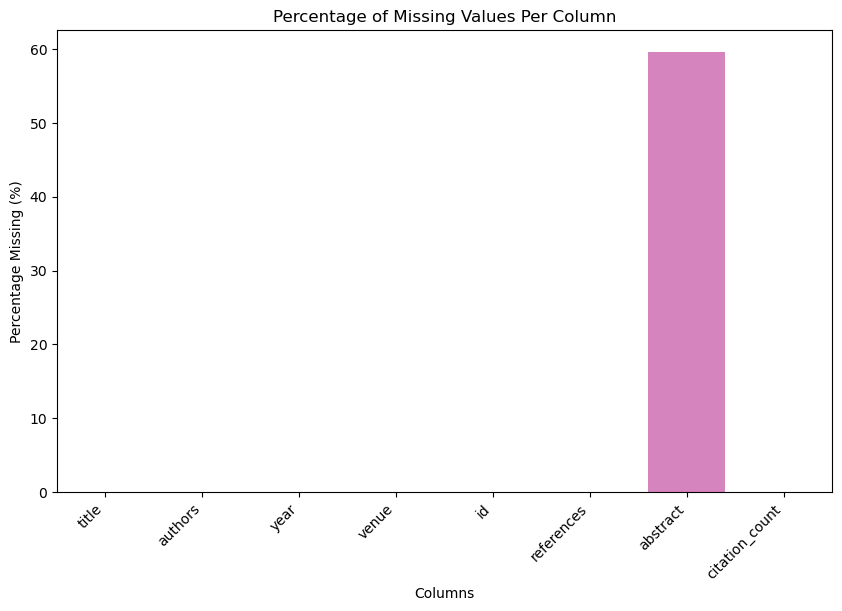


Analysis of Missing 'abstract' Data by Year:
-1       35387
 1936       12
 1937       15
 1938       10
 1939       18
         ...  
 2007    63914
 2008    65886
 2009    53881
 2010    36465
 2011       16
Name: year, Length: 77, dtype: int64

Analysis of Missing 'abstract' Data by Venue:
CoRR                                        20471
Discrete Mathematics                         9574
ICRA                                         9494
IEEE Transactions on Information Theory      7179
Applied Mathematics and Computation          5953
ISCAS                                        5370
European Journal of Operational Research     5147
IEICE Transactions                           5092
Commun. ACM                                  5077
Theor. Comput. Sci.                          4940
Name: venue, dtype: int64


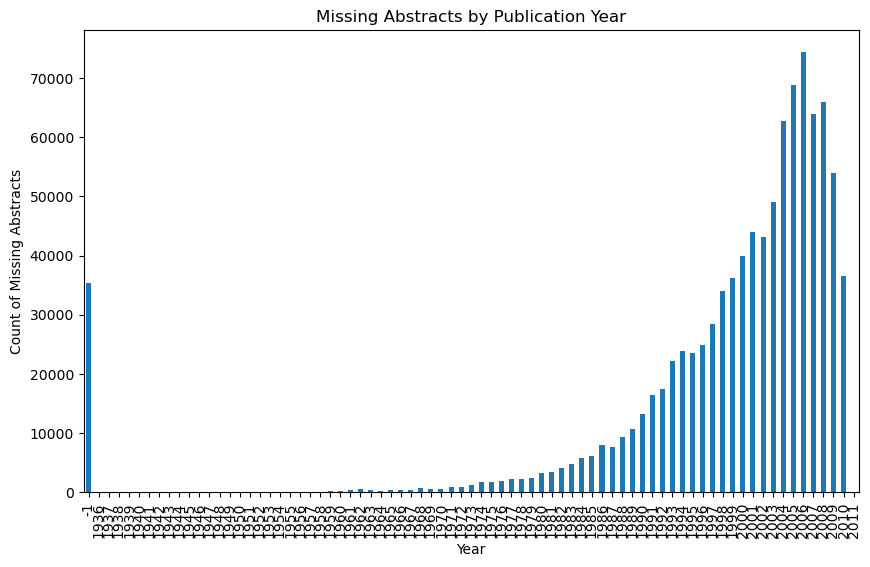

In [35]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)

# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.title('Percentage of Missing Values Per Column')
plt.ylabel('Percentage Missing (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

# For instance, check if missing abstracts are associated with certain years or venues
print("\nAnalysis of Missing 'abstract' Data by Year:")
print(df[df['abstract'].isnull()]['year'].value_counts().sort_index())

print("\nAnalysis of Missing 'abstract' Data by Venue:")
missing_by_venue = df[df['abstract'].isnull()]['venue'].value_counts().head(10)
print(missing_by_venue)

# Optionally, plot missing abstract data by year to see the trend
plt.figure(figsize=(10, 6))
df[df['abstract'].isnull()]['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Missing Abstracts by Publication Year')
plt.xlabel('Year')
plt.ylabel('Count of Missing Abstracts')
plt.show()

Insight : There's a noticeable trend of increasing missing abstracts from publications as we approach more recent years. This is somewhat counterintuitive since we might expect more recent records to be more complete. This could be due to the way the data was collected or compiled or length of abstract or problem with sourcing data.

In [39]:

# Filter the DataFrame for rows where 'year' is -1
rows_with_negative_year = df[df['year'] == -1]

# how many rows have -1 as year
print("Number of rows with -1 as year:", len(rows_with_negative_year))


Number of rows with -1 as year: 158700


Insight: There are 158700 rows with year as -1, which indicates error. So it needs to be removed.

In [40]:
#removings rows with year -1
df = df[df['year'] != -1]


# Correlation Analysis

In [55]:
# Quantify 'venue' by the mean 'citation_count' per 'venue'
venue_citation_mean = df.groupby('venue')['citation_count'].mean()

# Map the mean citation counts back onto each row of the original DataFrame
df['venue_citation_avg'] = df['venue'].map(venue_citation_mean)

# Calculate the correlation matrix for numerical features including our new 'venue_citation_avg'
correlation_matrix = df[['year', 'citation_count', 'venue_citation_avg']].corr()

# Print the correlation matrix
print(correlation_matrix)

                        year  citation_count  venue_citation_avg
year                1.000000       -0.097946           -0.231413
citation_count     -0.097946        1.000000            0.334197
venue_citation_avg -0.231413        0.334197            1.000000


Insight: No problem with correlation